<a href="https://colab.research.google.com/github/NguyenKz/AutoCrawlCrytop/blob/main/Ollama_Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run Ollama in Colab
---

[![5aharsh/collama](https://raw.githubusercontent.com/5aharsh/collama/main/assets/banner.png)](https://github.com/5aharsh/collama)

This is an example notebook which demonstrates how to run Ollama inside a Colab instance. With this you can run pretty much any small to medium sized models offerred by Ollama for free.

For the list of available models check [models being offerred by Ollama](https://ollama.com/library).


## Before you proceed
---

Since by default the runtime type of Colab instance is CPU based, in order to use LLM models make sure to change your runtime type to T4 GPU (or better if you're a paid Colab user). This can be done by going to **Runtime > Change runtime type**.

While running your script be mindful of the resources you're using. This can be tracked at **Runtime > View resources**.

## Running the notebook
---

After configuring the runtime just run it with **Runtime > Run all**. And you can start tinkering around. This example uses [Llama 3.2](https://ollama.com/library/llama3.2) to generate a response from a prompted question using [LangChain Ollama Integration](https://python.langchain.com/docs/integrations/chat/ollama/).

## Installing Dependencies
---

1. `pciutils` is required by Ollama to detect the GPU type.
2. Installation of Ollama in the runtime instance will be taken care by `curl -fsSL https://ollama.com/install.sh | sh`




In [3]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,201 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,573 kB]
Hit:13 https://ppa.launchpadcontent.net/ubu

In [7]:
!pip install langchain-ollama

In [2]:

import threading
import subprocess
import time

class OllamaServer:
    def __init__(self):
        self.process = None

    def start(self):
        print("Starting Ollama...")
        # stdout=subprocess.DEVNULL hides the logs to keep notebook clean
        self.process = subprocess.Popen(
            ["ollama", "serve"],
            stdout=subprocess.DEVNULL,
            stderr=subprocess.DEVNULL
        )
        time.sleep(2) # Give it a moment to boot
        print(f"Ollama started with PID: {self.process.pid}")

    def stop(self):
        if self.process:
            print("Stopping Ollama...")
            self.process.terminate() # or .kill()
            self.process.wait()
            self.process = None
            print("Ollama stopped.")
        else:
            print("Ollama is not running.")


In [9]:
!ollama pull deepseek-ocr:3b

Starting Ollama...
Ollama started with PID: 10299



Url:  https://static.textedge.net/cs/2025/11/01/image/e91fbfedd29c808536d5575e4698d40d
Saving to: /content/input_image.jpeg


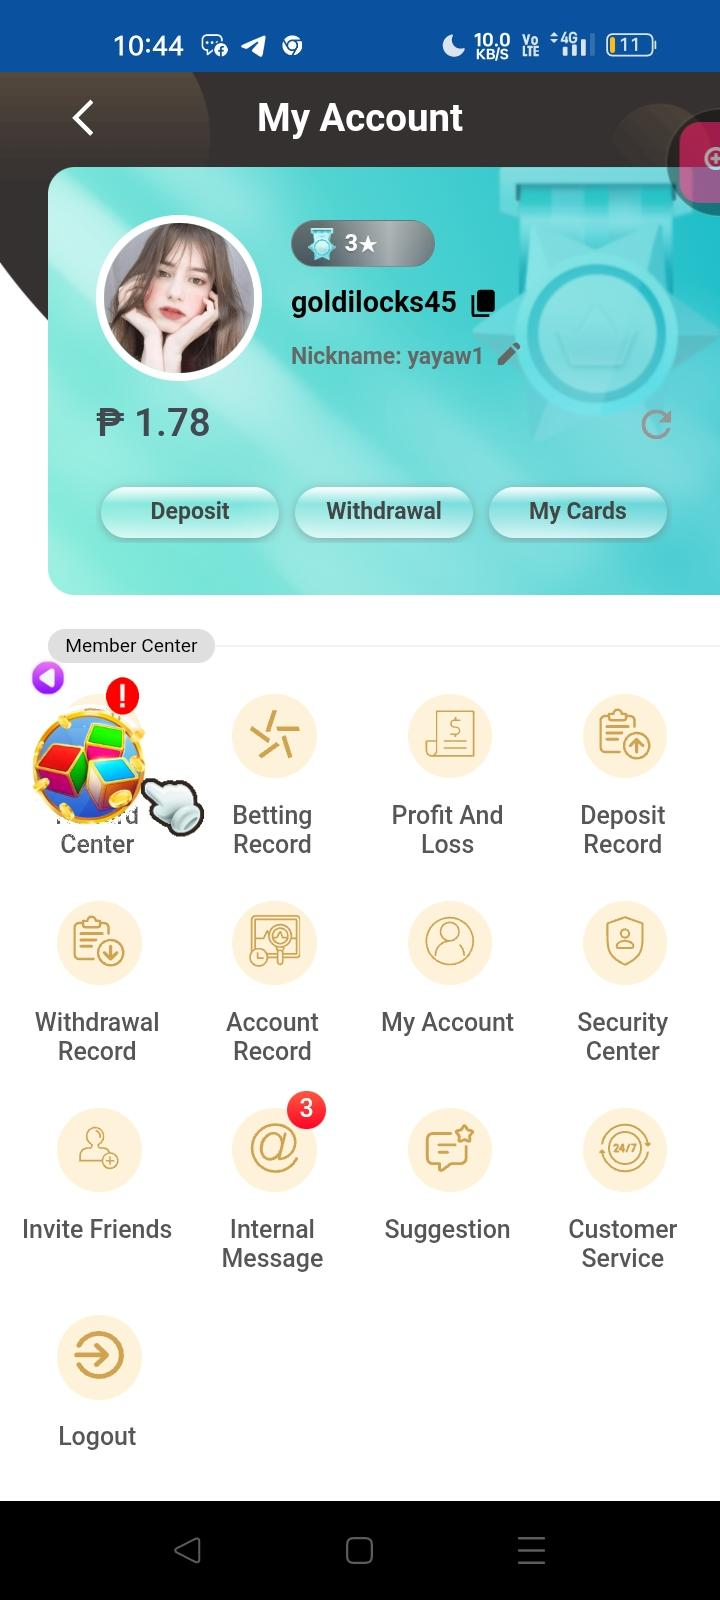

OllamaLLM
Params: {}


In [ ]:
import base64
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
from IPython.display import Markdown

# Kill ollama


import threading
import subprocess
import time
import subprocess
import time

import base64
import time  # <--- Added missing import
import requests
import os
from uuid import uuid4
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
from IPython.display import Markdown, display
from PIL import Image
import io
import requests
import os


# Usage:
server = OllamaServer()
server.start()

def get_image_from_url(url: str) -> str:
    response = requests.get(url)
    response.raise_for_status()

    # Ensure directory exists
    save_dir = "/content/"
    if not os.path.exists(save_dir):
        save_dir = "./"

    # Set fixed filename
    image_path = os.path.join(save_dir, "input_image.jpeg")
    print(f"Saving to: {image_path}")

    # Use PIL to read the bytes and save strictly as JPEG
    image_file = io.BytesIO(response.content)
    with Image.open(image_file) as img:
        # Convert to RGB (necessary if input is PNG with transparency)
        img = img.convert('RGB')
        img.save(image_path, "JPEG")

    return image_path


urls = [
    "https://static.textedge.net/cs/2025/11/01/image/e91fbfedd29c808536d5575e4698d40d",
    "https://static.textedge.net/cs/2025/11/01/image/4709c343c560cd22d00deb4c176347b4",
    "https://static.textedge.net/cs/2025/11/01/image/021018c90c35e48e3a49a43c66708537",
    "https://static.textedge.net/cs/2025/11/01/image/f560c879f3988e2d944cf8f61146d28c",
]
for url in urls:
  print("\n\n")
  print("Url: ",url)
  input_path = get_image_from_url(url)
  # 1. Define a helper function to encode the image to Base64
  def encode_image(image_path):
      with open(image_path, "rb") as image_file:
          return base64.b64encode(image_file.read()).decode('utf-8')

  # 2. Load your image
  image_path = input_path
  base64_image = encode_image(image_path)
  # display image
  display(Image.open(image_path))
  template = """
You are an CS Agent form game Industry. Your task is extract the image infomation to have the Agent understands it.
You must to think step by step to extract all impotant information of this image.
Question: Extract important and helpful information from this image by readable and understandable way. Must be include a short explaination and important information.
  """

  prompt = ChatPromptTemplate.from_template(template)
  try:
    print(model)
  except:
    model = OllamaLLM(model="deepseek-ocr:3b")

  # 3. Bind the image to the model so it receives the visual data
  #    (Ollama expects a list of base64 strings for the 'images' parameter)
  chain = prompt | model.bind(images=[base64_image])
  start_time = time.time()
  # 4. Invoke the chain with a relevant prompt for OCR
  response = chain.invoke({"question": """

  """})
  display(Markdown("Raw output: "+response))
  display(Markdown("## Output:\n"+response))
  print(f"Time taken: {round(time.time() - start_time,3)} seconds")
